In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("../data/selected_M_best13.csv")
df = df.drop_duplicates()
print(df.head())

   ILMN_1654609  ILMN_1657898  ILMN_1667500  ILMN_1671005  ILMN_1680347  \
0       13.1600        8.9263        8.4448       11.4310       10.9665   
1       13.6183        8.6274        8.3387       12.1278       10.6635   
2       12.5893        8.3385        8.0199       10.5202        9.4681   
3       12.4219        8.2053        8.0968       10.2085        9.7403   
4       12.0954        8.2168        8.1602       10.1140        9.4992   

   ILMN_1717229  ILMN_1755911  ILMN_1767168  ILMN_1794233  ILMN_1803561  \
0        9.7426        8.5827        9.1624        8.8507        8.3141   
1       10.0959        8.5797        9.1364        8.7934        8.3158   
2        8.7295        8.5216        9.0568        8.6468        8.3195   
3        8.7190        8.5182        8.7428        8.4454        8.2468   
4        8.7705        8.4635        8.6005        8.5345        8.3591   

   ILMN_1812970  ILMN_2159384  ILMN_2165762  Results  
0        8.9913        9.7306        9.8590

In [3]:
df.columns

Index(['ILMN_1654609', 'ILMN_1657898', 'ILMN_1667500', 'ILMN_1671005',
       'ILMN_1680347', 'ILMN_1717229', 'ILMN_1755911', 'ILMN_1767168',
       'ILMN_1794233', 'ILMN_1803561', 'ILMN_1812970', 'ILMN_2159384',
       'ILMN_2165762', 'Results'],
      dtype='object')

In [4]:
def map_results(inpt):
    if inpt == 'control':
        return 0;

    else:
        return 1;

In [5]:
df['Results'] = df['Results'].apply(map_results)
print(df.head())

   ILMN_1654609  ILMN_1657898  ILMN_1667500  ILMN_1671005  ILMN_1680347  \
0       13.1600        8.9263        8.4448       11.4310       10.9665   
1       13.6183        8.6274        8.3387       12.1278       10.6635   
2       12.5893        8.3385        8.0199       10.5202        9.4681   
3       12.4219        8.2053        8.0968       10.2085        9.7403   
4       12.0954        8.2168        8.1602       10.1140        9.4992   

   ILMN_1717229  ILMN_1755911  ILMN_1767168  ILMN_1794233  ILMN_1803561  \
0        9.7426        8.5827        9.1624        8.8507        8.3141   
1       10.0959        8.5797        9.1364        8.7934        8.3158   
2        8.7295        8.5216        9.0568        8.6468        8.3195   
3        8.7190        8.5182        8.7428        8.4454        8.2468   
4        8.7705        8.4635        8.6005        8.5345        8.3591   

   ILMN_1812970  ILMN_2159384  ILMN_2165762  Results  
0        8.9913        9.7306        9.8590

In [6]:

df.describe()

,ILMN_1654609,ILMN_1657898,ILMN_1667500,ILMN_1671005,ILMN_1680347,ILMN_1717229,ILMN_1755911,ILMN_1767168,ILMN_1794233,ILMN_1803561,ILMN_1812970,ILMN_2159384,ILMN_2165762,Results
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,12.634358,8.361906,8.240606,10.812333,10.141674,9.402969,8.560636,8.630438,8.665949,8.531041,8.365388,9.127508,9.288769,0.707143
std,0.787855,0.348476,0.238972,0.782629,0.618837,0.616764,0.269350,0.347360,0.390432,0.282366,0.479864,0.610215,0.504955,0.456707
min,9.570600,7.708100,7.830800,8.556300,8.136300,7.841600,8.008300,7.950500,8.013300,8.059700,7.618600,7.852400,8.262500,0.000000
25%,12.086050,8.128750,8.088375,10.215175,9.633800,8.875400,8.386200,8.374525,8.394500,8.316700,8.018450,8.679300,8.943925,0.000000
50%,12.694350,8.254400,8.159700,10.779850,10.244050,9.441000,8.531550,8.564100,8.539800,8.482300,8.155100,9.066750,9.220950,1.000000
75%,13.167725,8.539750,8.339600,11.397900,10.530725,9.823850,8.711575,8.856650,8.840075,8.686850,8.649025,9.559950,9.691450,1.000000
max,13.997800,9.626600,9.235600,12.475300,11.692400,10.719600,9.290200,9.619000,9.946000,9.387100,9.860400,10.433700,10.547200,1.000000


In [7]:
df_features = list(df.columns)
print(df_features)
print(len(df.columns))

['ILMN_1654609', 'ILMN_1657898', 'ILMN_1667500', 'ILMN_1671005', 'ILMN_1680347', 'ILMN_1717229', 'ILMN_1755911', 'ILMN_1767168', 'ILMN_1794233', 'ILMN_1803561', 'ILMN_1812970', 'ILMN_2159384', 'ILMN_2165762', 'Results']
14


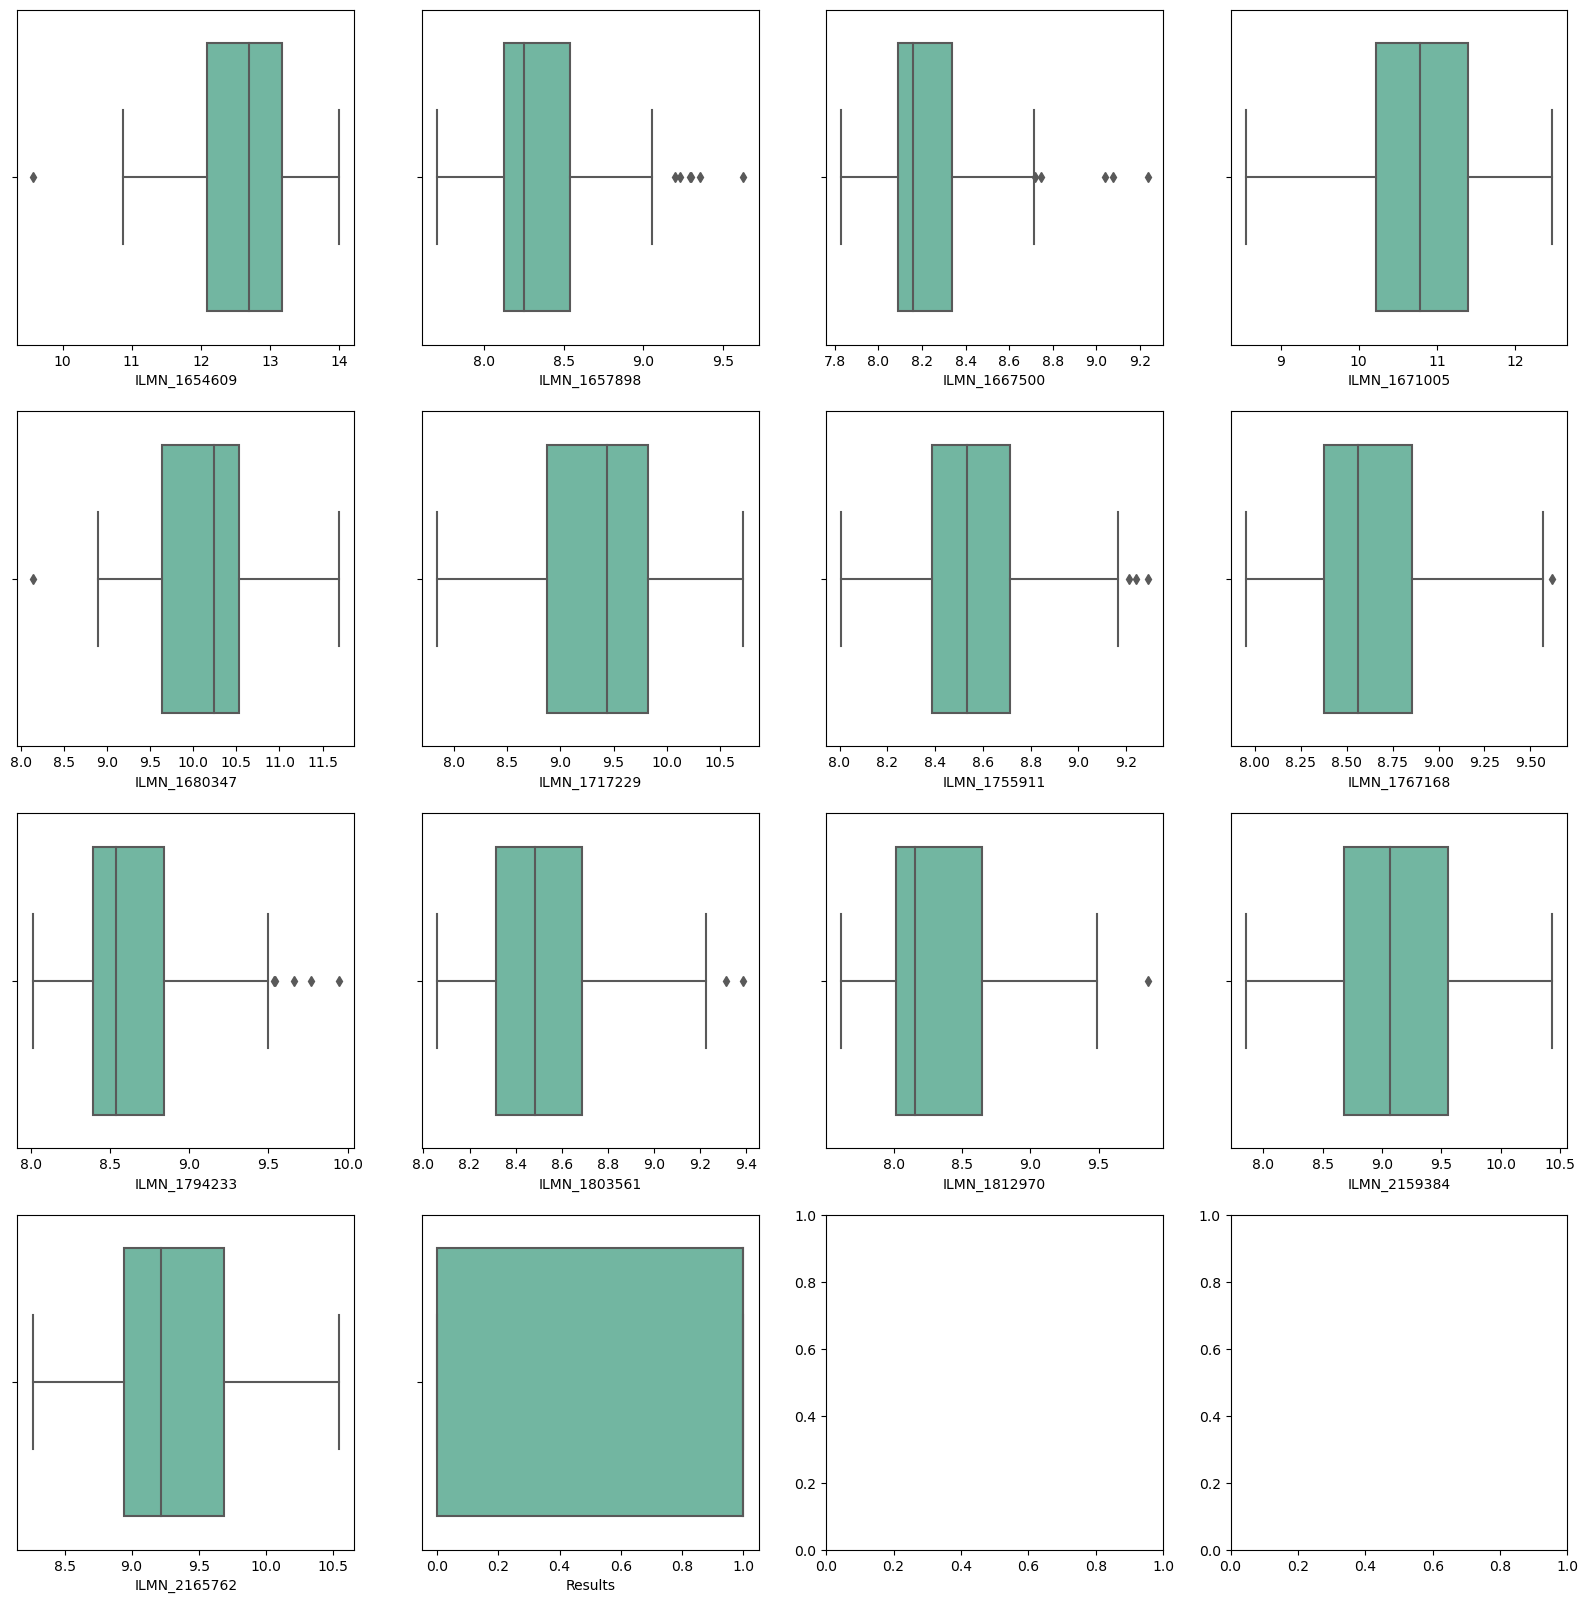

In [8]:
fig, axes = plt.subplots(4,4, figsize=(20,20))
x_,y_ = 0,0
for i, column in enumerate(df.columns[0:]):    
    sb.boxplot(x=df[column], ax=axes[x_,y_], palette="Set2")
    if i < 3:
        y_ += 1
    elif i == 3: 
        x_ = 1
        y_ = 0
    elif i == 7:
        x_ = 2
        y_ = 0

    elif i == 11:
        x_ = 3
        y_ = 0
    
    else:
        y_ += 1

In [9]:
cols = df.columns
print(cols)
scaler = MinMaxScaler()
dat = scaler.fit_transform(df)
df_02 = pd.DataFrame(data=dat, columns=cols)  
print(df_02.head())

Index(['ILMN_1654609', 'ILMN_1657898', 'ILMN_1667500', 'ILMN_1671005',
       'ILMN_1680347', 'ILMN_1717229', 'ILMN_1755911', 'ILMN_1767168',
       'ILMN_1794233', 'ILMN_1803561', 'ILMN_1812970', 'ILMN_2159384',
       'ILMN_2165762', 'Results'],
      dtype='object')
   ILMN_1654609  ILMN_1657898  ILMN_1667500  ILMN_1671005  ILMN_1680347  \
0      0.810761      0.634975      0.437073      0.733529      0.795872   
1      0.914280      0.479176      0.361546      0.911329      0.710666   
2      0.681853      0.328590      0.134610      0.501123      0.374511   
3      0.644041      0.259161      0.189351      0.421587      0.451056   
4      0.570293      0.265155      0.234482      0.397474      0.383257   

   ILMN_1717229  ILMN_1755911  ILMN_1767168  ILMN_1794233  ILMN_1803561  \
0      0.660528      0.448085      0.726341      0.433280      0.191653   
1      0.783287      0.445745      0.710758      0.403632      0.192934   
2      0.308513      0.400421      0.663051      0.327

In [10]:
x = df_02.drop(["Results"], axis =1);
y = df["Results"]
print(y.value_counts())

1    99
0    41
Name: Results, dtype: int64


(array([41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 99.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

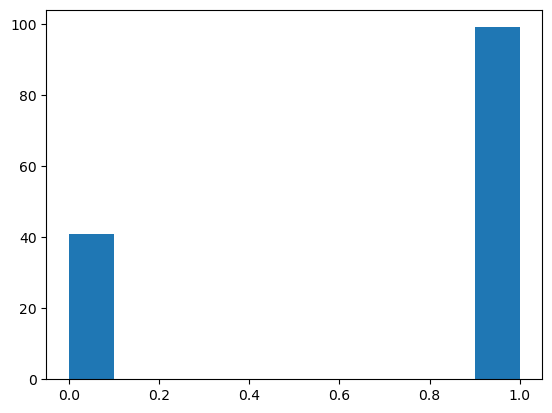

In [11]:
plt.hist(y)

1    58
0    41
Name: Results, dtype: int64


(array([41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 58.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

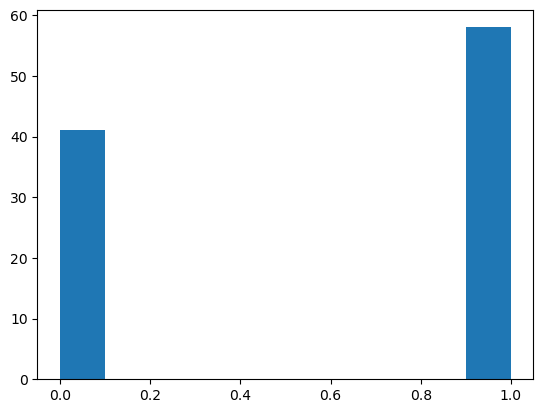

In [12]:
# transform the dataset
under = RandomUnderSampler(sampling_strategy= 0.7)
X, Y = under.fit_resample(x, y)
print(Y.value_counts())
plt.hist(Y)

0    58
1    58
Name: Results, dtype: int64


(array([58.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 58.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

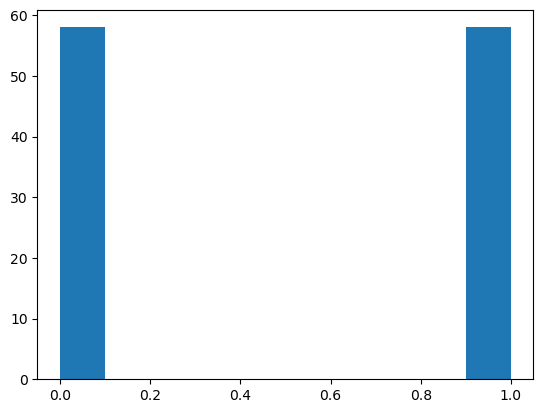

In [13]:
smt = SMOTE()
X, Y = smt.fit_resample(X,Y)
print(Y.value_counts())
plt.hist(Y)

In [14]:
# creating a decision tree classifier
dt_model = tree.DecisionTreeClassifier()
param_grid_dt = {
     
}
cv_array = [2,3,4,5]
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {}
Accuracy :  84.483
Standed deviation :  1.724
CV value :  3
Parameters :  {}
Accuracy :  88.844
Standed deviation :  4.296
CV value :  4
Parameters :  {}
Accuracy :  88.793
Standed deviation :  6.622
CV value :  5
Parameters :  {}
Accuracy :  85.326
Standed deviation :  6.540


In [15]:
# creating a Gradient boosting classifier
gb_model = GradientBoostingClassifier()
param_grid_gb = {
     'random_state': [0, 1, 2,3,4,5 , 10, 20, 30, 40, 50]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'random_state': 0}
Accuracy :  85.345
Standed deviation :  0.862
CV value :  3
Parameters :  {'random_state': 20}
Accuracy :  89.676
Standed deviation :  2.012
CV value :  4
Parameters :  {'random_state': 2}
Accuracy :  91.379
Standed deviation :  3.855
CV value :  5
Parameters :  {'random_state': 0}
Accuracy :  89.674
Standed deviation :  6.467


In [16]:
# creating a KNN classifier
KNN_model =KNeighborsClassifier()
param_grid_knn = {
     'n_neighbors': [3, 5, 7, 11, 13, 17]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=KNN_model, param_grid=param_grid_knn, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'n_neighbors': 5}
Accuracy :  88.793
Standed deviation :  4.310
CV value :  3
Parameters :  {'n_neighbors': 3}
Accuracy :  93.972
Standed deviation :  3.187
CV value :  4
Parameters :  {'n_neighbors': 3}
Accuracy :  92.241
Standed deviation :  6.156
CV value :  5
Parameters :  {'n_neighbors': 3}
Accuracy :  93.043
Standed deviation :  4.434


In [17]:
# creating a Lgistic regression classifier
lr_model = LogisticRegression() 

param_grid_lr = {
     'max_iter': [100, 200, 300, 400, 500]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'max_iter': 100}
Accuracy :  86.207
Standed deviation :  1.724
CV value :  3
Parameters :  {'max_iter': 100}
Accuracy :  85.335
Standed deviation :  1.315
CV value :  4
Parameters :  {'max_iter': 100}
Accuracy :  87.069
Standed deviation :  2.859
CV value :  5
Parameters :  {'max_iter': 100}
Accuracy :  85.362
Standed deviation :  3.380


In [18]:
# creating a Nave Bayers classifier
nb_model = MultinomialNB()
param_grid_nb = {

}
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {}
Accuracy :  87.931
Standed deviation :  1.724
CV value :  3
Parameters :  {}
Accuracy :  89.676
Standed deviation :  2.012
CV value :  4
Parameters :  {}
Accuracy :  90.517
Standed deviation :  4.479
CV value :  5
Parameters :  {}
Accuracy :  89.674
Standed deviation :  4.375


In [19]:
# creating a SVM classifier
svm_model = svm.SVC()
param_grid_svm = {
     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'kernel': 'poly'}
Accuracy :  89.655
Standed deviation :  5.172


CV value :  3
Parameters :  {'kernel': 'poly'}
Accuracy :  90.508
Standed deviation :  1.277
CV value :  4
Parameters :  {'kernel': 'poly'}
Accuracy :  90.517
Standed deviation :  5.100
CV value :  5
Parameters :  {'kernel': 'poly'}
Accuracy :  91.413
Standed deviation :  5.417


In [20]:
# creating a Random forest classifier
rf = RandomForestClassifier()
param_grid_rf = {
     'max_depth': [80, 90, 100, 110, 150, 200, 300],
     'max_features': [2, 3, 4, 5,6],
     'n_estimators': [100, 200, 300]
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'max_depth': 80, 'max_features': 2, 'n_estimators': 200}
Accuracy :  91.379
Standed deviation :  1.724
CV value :  3
Parameters :  {'max_depth': 80, 'max_features': 4, 'n_estimators': 100}
Accuracy :  92.263
Standed deviation :  2.039
CV value :  4
Parameters :  {'max_depth': 80, 'max_features': 4, 'n_estimators': 100}
Accuracy :  92.241
Standed deviation :  6.156
CV value :  5
Parameters :  {'max_depth': 100, 'max_features': 2, 'n_estimators': 100}
Accuracy :  92.246
Standed deviation :  4.248
